In [ ]:
# activate virtual environment with:
# C:\Users\mosco\.venvs\b1-scientific-coding\Scripts\activate.ps1

In [1]:
# Add relevant Jupyter notebook extensions 
import numpy as np



In [4]:
# You can double-check your Python path like this...
import sys  

sys.path.append('../')
print(sys.path)

['C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\python311.zip', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\DLLs', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\Lib', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0', 'c:\\Users\\mosco\\.venvs\\b1-scientific-coding', '', 'c:\\Users\\mosco\\.venvs\\b1-scientific-coding\\Lib\\site-packages', 'c:\\Users\\mosco\\.venvs\\b1-scientific-coding\\Lib\\site-packages\\win32', 'c:\\Users\\mosco\\.venvs\\b1-scientific-coding\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\mosco\\.venvs\\b1-scientific-coding\\Lib\\site-packages\\Pythonwin', '../']


# Simulate closed-loop
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

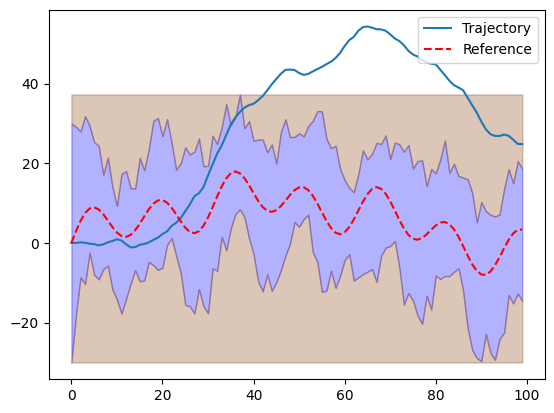

In [20]:
import sys

# Import relevant modules
import uuv_mission.dynamic as dy
import uuv_mission.control as ctrl

sub = dy.Submarine()
# Instantiate your controller (depending on your implementation)
mission = dy.Mission.from_csv("../data/mission.csv") # You must implement this method in the Mission class
reference = mission.reference
pos_y = sub.get_position()[1]

Kp = 0.15
Kd = 0.6

controller = ctrl.PDController(Kp, Kd)

error_0 = reference[0] - pos_y
error_diff_0 = 0

output = [0]*len(reference)
error = [0]*len(reference)
error_diff = [0]*len(reference)

output[0] = controller.compute_ouput(error_0, error_diff_0)
error[0] = error_0
error_diff[0] = error_diff_0

for i in range(1, len(reference)):
    error[i] = reference[i] - pos_y
    error_diff[i] = error[i] - error[i-1]
    output[i] = controller.compute_ouput(error[i], error_diff[i])

    

closed_loop = dy.ClosedLoop(sub, controller)
trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)

In [19]:
print(output[0])

0.0
